# Preprocessing Code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\individual+household+electric+power+consumption\household_power_consumption.csv',  # Rename to .csv if needed
                 sep=';',
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True,
                 na_values=['?'],
                 low_memory=False)

# Clean and convert
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

# Display the first few rows
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_51132\2472633299.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(r'C:\Users\HP\Downloads\individual+household+electric+power+consumption\household_power_consumption.csv',  # Rename to .csv if needed
C:\Users\HP\AppData\Local\Temp\ipykernel_51132\2472633299.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(r'C:\Users\HP\Downloads\individual+household+electric+power+consumption\household_power_consumption.csv',  # Rename to .csv if needed
C:\Users\HP\AppData\Local\Temp\ipykernel_51132\2472633299.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#### QUERY 1

I have a pandas DataFrame `df` containing household power consumption data from Dec 2006 to Nov 2010 at 1-minute intervals.

Preprocessing:
- Combined 'Date' and 'Time' into a datetime index (`df.index`)
- Removed missing values
- Converted 'Global_active_power' to float

The index is a DatetimeIndex. Use `.index.year` and `.index.month` for filtering (not `.dt`).

Task:
Write pandas code to calculate the average `Global_active_power` for March 2007 and print the result with 3 decimal places.

In [6]:
# Filter data for March 2007
march_2007_data = df[(df.index.year == 2007) & (df.index.month == 3)]

# Calculate average Global_active_power
average_power = march_2007_data['Global_active_power'].mean()

# Print result with 3 decimal places
print(f"Average Global Active Power for March 2007: {average_power:.3f}")

Average Global Active Power for March 2007: 1.319


#### Query 2

I have a pandas DataFrame `df` containing household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

The DataFrame uses a datetime index that was created by combining the original 'Date' and 'Time' columns. The index is of datetime type, and the data has already been cleaned to remove missing values. One of the columns, `Global_active_power`, is a float that represents power usage in kilowatts.

Task:
Write pandas code to:
1. Filter the data for December 25, 2006
2. Group the filtered data by hour of the day
3. Calculate the total `Global_active_power` used in each hour
4. Identify and print the hour with the highest total power usage, along with the usage amount (rounded to 3 decimal places)

In [9]:
# Filter the data for December 25, 2006
dec_25_2006 = df[df.index.date == pd.to_datetime('2006-12-25').date()]

# Group the filtered data by hour of the day and calculate the total power usage
max_power_hour = dec_25_2006.groupby(dec_25_2006.index.hour)['Global_active_power'].sum().idxmax()

# Print the hour with the highest total power usage
print(f"Hour with the highest total power usage: {max_power_hour}:00")
print(f"Total power usage: {round(dec_25_2006.groupby(dec_25_2006.index.hour)['Global_active_power'].sum().max(), 3)} kW")

Hour with the highest total power usage: 22:00
Total power usage: 252.892 kW


#### QUERY 3

I have a pandas DataFrame named `df` containing household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

- The index is a datetime index (`df.index`) created from the original 'Date' and 'Time' columns.
- The column `Global_active_power` is a float and represents energy usage in kilowatts.
- The data has been cleaned and does not contain missing values.

Task:
Write pandas code to:
1. Add a new column that classifies each row as "Weekday" or "Weekend" based on the day of the week in the datetime index.
2. Group the data by this classification.
3. Calculate and print the average `Global_active_power` for each group, rounded to 3 decimal places.
Use vectorized operations for performance.


In [14]:
import pandas as pd

def classify_and_group_power_consumption(df):
    # 1. Add a new column that classifies each row as "Weekday" or "Weekend"
    df['Day_Type'] = df.index.dayofweek.map({5: 'Weekend', 6: 'Weekend', 
                                            0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 
                                            3: 'Weekday', 4: 'Weekday'})

    # Alternatively, you can use np.where for a more concise solution
    # import numpy as np
    # df['Day_Type'] = np.where(df.index.dayofweek.isin([5, 6]), 'Weekend', 'Weekday')

    # 2. Group the data by this classification
    grouped_df = df.groupby('Day_Type')

    # 3. Calculate and print the average Global_active_power for each group
    avg_power = grouped_df['Global_active_power'].mean().round(3)
    print(avg_power)

# Example usage:
if __name__ == "__main__":
    # Assuming df is your DataFrame
    classify_and_group_power_consumption(df)

Day_Type
Weekday    1.035
Weekend    1.234
Name: Global_active_power, dtype: float64


#### QUERY 4

I have a pandas DataFrame `df` containing household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

- The index is a datetime index created from the original 'Date' and 'Time' columns.
- The data is cleaned and has no missing values.
- The column `Global_active_power` is a float representing active power usage in kilowatts.

Task:
1. Calculate daily energy consumption in kilowatt-hours (kWh), knowing each reading is 1 minute apart.
2. Identify and list the days where total energy consumption exceeds 5 kWh.
3. Print these dates along with the total energy consumed that day, sorted chronologically.


In [16]:
import pandas as pd

def calculate_daily_energy_consumption(df):
    """
    Calculate daily energy consumption in kWh and identify days with consumption > 5 kWh.

    Parameters:
    df (pd.DataFrame): DataFrame with household power consumption data.

    Returns:
    A DataFrame with dates and total energy consumed for days with > 5 kWh consumption.
    """

    # Ensure index is of datetime type
    df.index = pd.to_datetime(df.index)

    # Resample data to daily intervals and calculate sum of power * time (in hours)
    # Since data is 1-minute apart, we multiply by 1/60 to convert minutes to hours
    daily_energy_consumption = df['Global_active_power'].resample('D').sum() * (1/60)

    # Identify days with energy consumption > 5 kWh
    high_consumption_days = daily_energy_consumption[daily_energy_consumption > 5]

    return high_consumption_days

# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame
    high_consumption_days = calculate_daily_energy_consumption(df)

    # Print the dates and total energy consumed, sorted chronologically
    print(high_consumption_days.sort_index())

datetime
2006-12-16    20.152933
2006-12-17    56.507667
2006-12-18    36.730433
2006-12-19    27.769900
2006-12-20    37.095800
                ...    
2010-11-22    34.025600
2010-11-23    26.292267
2010-11-24    29.937467
2010-11-25    23.852733
2010-11-26    24.801733
Name: Global_active_power, Length: 1409, dtype: float64


#### QUERY 5

I have a pandas DataFrame `df` containing household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

- The index is a datetime index created by combining the original 'Date' and 'Time' columns.
- The data is cleaned and has no missing values.
- The column `Global_active_power` is a float representing active power usage in kilowatts.

Task:
1. Filter the data for the first week of January 2007 (from January 1 to January 7, inclusive).
2. Plot the `Global_active_power` over time using matplotlib.
3. Make sure the plot includes:
   - A title
   - Labeled axes
   - Proper date formatting on the x-axis


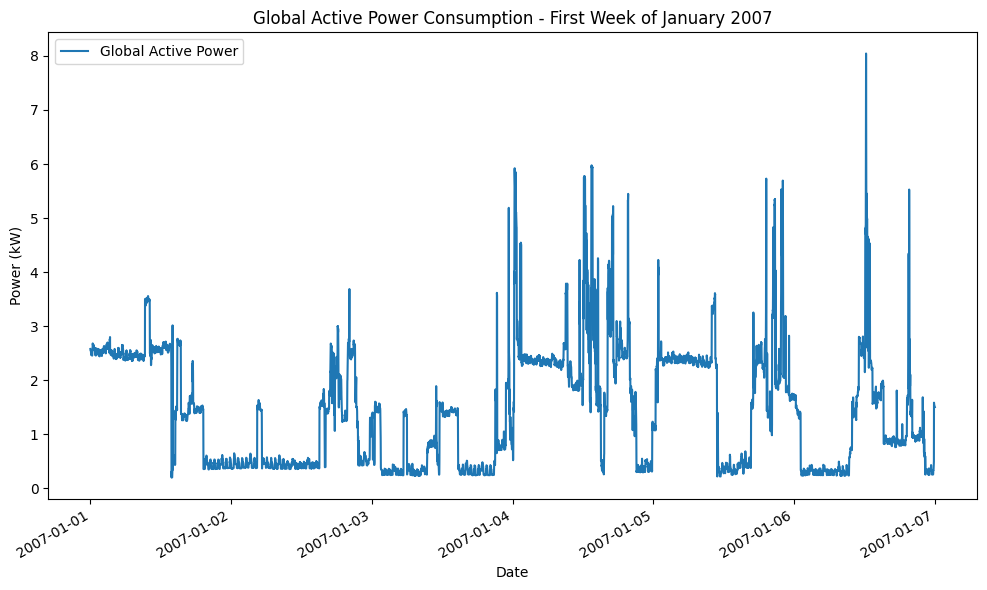

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def filter_and_plot_data(df):
    # Filter data for the first week of January 2007
    start_date = '2007-01-01'
    end_date = '2007-01-07'
    filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

    # Plot Global_active_power over time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df.index, filtered_df['Global_active_power'], label='Global Active Power')

    # Set title and labels
    plt.title('Global Active Power Consumption - First Week of January 2007')
    plt.xlabel('Date')
    plt.ylabel('Power (kW)')

    # Format x-axis dates
    date_formatter = mdates.DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gcf().autofmt_xdate()

    # Show legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame
filter_and_plot_data(df)

#### QUERY 6

I have a pandas DataFrame named `df` that contains household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

- The DataFrame uses a datetime index created by combining 'Date' and 'Time' columns.
- The data is cleaned and has no missing values.
- `Voltage` is a float column representing the average voltage at each minute.

Task:
1. Filter the data for the first week of February 2007 (February 1 to February 7, inclusive).
2. Group the data by day.
3. Calculate the average `Voltage` for each day in that week.
4. Return or print the results, rounded to 2 decimal places.


In [18]:
import pandas as pd

def calculate_average_voltage(df):
    # Ensure the index is of datetime type
    df.index = pd.to_datetime(df.index)

    # Filter the data for the first week of February 2007
    start_date = '2007-02-01'
    end_date = '2007-02-07'
    filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

    # Group the data by day and calculate the average Voltage
    daily_avg_voltage = filtered_df['Voltage'].resample('D').mean()

    # Return the results rounded to 2 decimal places
    return daily_avg_voltage.round(2)

# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame
    result = calculate_average_voltage(df)
    print(result)

datetime
2007-02-01    240.39
2007-02-02    240.33
2007-02-03    238.91
2007-02-04    239.63
2007-02-05    240.81
2007-02-06    241.26
2007-02-07    243.53
Freq: D, Name: Voltage, dtype: float64


#### QUERY 7

I have a pandas DataFrame named `df` that contains household power consumption data recorded at 1-minute intervals from December 2006 to November 2010.

- The index is a datetime index created by combining the original 'Date' and 'Time' columns.
- The data has been cleaned and does not contain missing values.
- The column `Global_active_power` is a float that represents power usage in kilowatts.
- The DataFrame also contains three float columns: `Sub_metering_1`, `Sub_metering_2`, and `Sub_metering_3`.

Task:
1. Calculate the Pearson correlation between `Global_active_power` and each of the three sub-metering columns.
2. Return the results in a clear and readable format (e.g., a correlation matrix or labeled output).

In [19]:
import pandas as pd

def calculate_correlation(df):
    # Select the relevant columns
    columns = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

    # Calculate the Pearson correlation
    correlation_matrix = df[columns].corr()

    # Extract the correlation with Global_active_power
    correlations = correlation_matrix['Global_active_power'].drop('Global_active_power')

    return correlations

# Example usage
correlations = calculate_correlation(df)
print(correlations)

Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64


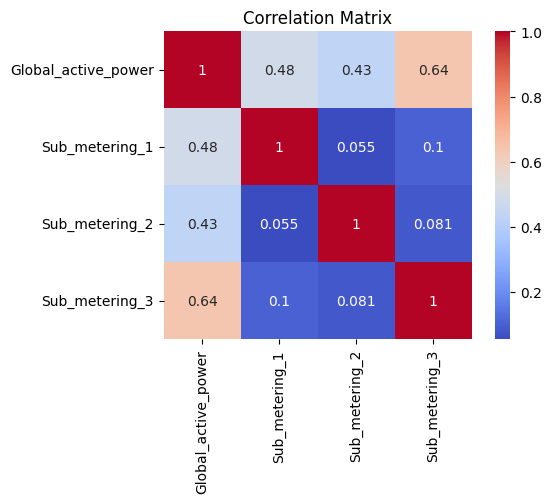

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df):
    # Select the relevant columns
    columns = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

    # Calculate the Pearson correlation
    correlation_matrix = df[columns].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

# Example usage
plot_correlation_matrix(df)